# intro to transfer functions

**learning objectives:**
* reinforce the concept of a transfer function
* know that, with a transfer function, we can obtain the process response to any input
* simulate the response of processes to different inputs via a transfer function model, using `Controlz.jl`

documentation for `Controlz.jl` is [here](https://simonensemble.github.io/Controlz.jl/dev/). install the latest version via `]add Controlz#master`.

In [2]:
using Controlz # this *might* take a few min to compile
using PyPlot   # for plotting via matplotlib

# (optional) hipster plot theme
PyPlot.matplotlib.style.use("https://raw.githubusercontent.com/SimonEnsemble/Controlz.jl/master/src/hipster.mplstyle")

## the liquid storage system (flow in/out of a tank)

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/liq_in_out_tank.png" alt="Smiley face" width=600>

a dynamic model for this process, in deviation form, is (see lecture notes):
\begin{equation}
    A \frac{dh^*}{dt} = q_i^* -\frac{1}{R} h^*
\end{equation}

* **the input** is $q_i^*(t)$
* **the output** is (conceptually, not literally) $h^*(t)$

the transfer function $G(s)$ is (see lecture notes):

\begin{equation}
    G(s) = \frac{H^*(s)}{Q_i^*(s)}=\frac{R}{ARs+1}
\end{equation}

the area $A$ and exit line resistance $R$ are provided in the code cell below.

In [3]:
A = 2.0 # m²
R = 0.5 # min / m². intuitive that we see units of area here: friction of fluid with the *walls* of the pipe!

0.5

#### the steady state values $\bar{q_i}$ and $\bar{h}$

(0) at steady state conditions, the incoming liquid flow rate is $\bar{q_i}=3$ m$^3$/min.
what is the corresponding steady state value of the liquid level, $\bar{h}$? Define it as a variable `h̄` in the code cell below.

In [4]:
q̄ᵢ = 3.0   # m³/min. I got this via `q\bar`, then hit `Tab`. the subscript is via `\_i` then `Tab`
h̄ = q̄ᵢ * R #since dh/dt = 0. isolate and solve for h!

1.5

#### constructing a transfer function in `Controlz.jl`

(1) using `Controlz.jl`, construct the transfer function $G(s)$ as a variable in Julia, `G`. see docs [here](https://simonensemble.github.io/Controlz.jl/dev/tfs/#constructing-a-transfer-function). I find way #1 is most intutive. use the variables defined above, `A` and `R`, so, if we change them later, `G` can automatically update.

In [5]:
g = R/(A * R * s + 1) #transfer function


    0.5
-----------
1.0*s + 1.0

#### poles and zeros of a transfer function in `Controlz.jl`

(2a) on pencil and paper, find the poles and zeros of $G(s)$.
* the **zeros** of $G(s)$ are $\{s: G(s)=0\}$ (the roots of the numerator in the rational function $G(s)$)
* the **poles** of $G(s)$ are $\{s: 1/G(s)=0\}$ (the roots of the denominator in the rational function $G(s)$)

(2b) visualize the poles and zeros of the transfer function `G` in the complex plane via the function `viz_poles_and_zeros`. see docs [here](https://simonensemble.github.io/Controlz.jl/dev/viz/#poles-and-zeros-of-a-transfer-function).
does this correspond to your hand-calculations?

(2c) a (unique) pole $p_k$ in $H^*(s)$ will generate terms in the response $e^{p_kt}$ (see lecture notes on partial fraction expansion). qualitatively, then, what kind of response do you expect to see from an impuse input? decaying response modes, or growing? oscillations?

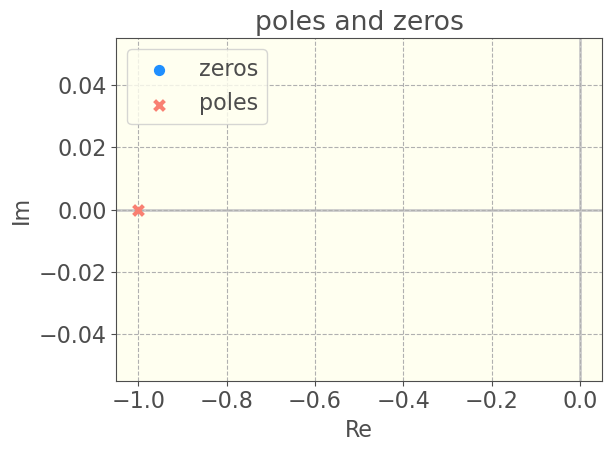

findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans.


In [6]:
viz_poles_and_zeros(g) #there are no zeros!

the pole is negative and real. thus, I expect the impulse response to decay with time and not exhibit oscillations. this is because a pole $p$ will give us terms $e^{bt}$ in the response, and here $b$ is negative and real => response is a decaying exponential.

#### gain of a transfer function in `Controlz.jl`

(3a) on pencil and paper, compute the gain of the transfer function $G(s)$.

(3b) see docs [here](https://simonensemble.github.io/Controlz.jl/dev/tfs/#poles,-zeros,-and-zero-frequency-gain-of-a-transfer-function) to learn how to compute the zeros, poles, and gain of a transfer function all in one function! does your computed gain equal the one computed by `Controlz.jl`?

In [7]:
z, p, gain = zeros_poles_gain(g) #setting the zeros, poles, and gain of the function

(Float64[], [-1.0], 0.5)

### simulating the response to different inputs

let us simulate the response $H^*(s)$ of our liquid storage system to different inputs $Q_i^*(s)$.

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/liq_storage_sys.png" alt="Smiley face" width=600>

(4) Mathematically, write the output $H^*(s)$ in terms of $G(s)$ and $Q_i^*(s)$. This holds for every input $Q_i^*(s)$.

$H^*(s)=G(s)Q_i^*(s)$

the transfer function representation assumes that the process is initially operating at steady state, so the following initial conditions hold for both scenarios below:
* $q_i(t=0)=\bar{q_i} \implies q_i^*(t=0)=0$.
* $h(t=0)=\bar{h} \implies h^*(t=0)=0$

####  response to step

the process is initially at steady state, then, at $t=0$, suddenly $q_i(t)$ reduces by 2 m$^3$/min and is held there indefinitely. this can be modeled as a step input. 

(5) based on the gain of the transfer function, what will be the new steady state value of $h$, $h(t\rightarrow\infty)$? define it as a variable `h∞`.

In [8]:
step = -2
h∞ = gain * (q̄ᵢ + step) 
#step*gain*h̄ # step * gain * h̄,  suddenly outlet valve is turned on, step is -2 

LoadError: cannot assign a value to variable Base.step from module Main

(6) adapt the example in the `Controlz.jl` documentation [here](https://simonensemble.github.io/Controlz.jl/dev/sim/#response-of-an-underdamped-second-order-system-to-a-unit-step-input) to simulate and visualize the response $h^*(t)$ to the step input $q_i(t)$ for $t\in[0, 10]$ min. you can change the x and y-label of the figure in `viz_response` by e.g. passing `plot_ylabel=L"$h^*(t)$"`.

In [9]:
U = step / s #step of -2
Y = g * U
data = simulate(Y,10.0)
#data = [:,:t] #empty columns, not needed here
#data = [:, output] #empty columns, not needed here
viz_response(data, plot_title="Response to Step Plot")

LoadError: MethodError: no method matching /(::typeof(step), ::TransferFunction)
Closest candidates are:
  /(!Matched::TransferFunction, ::TransferFunction) at C:\Users\yrose\.julia\packages\Controlz\YbLC5\src\tf.jl:96
  /(!Matched::PyCall.PyObject, ::Any) at C:\Users\yrose\.julia\packages\PyCall\BcTLp\src\pyoperators.jl:13
  /(!Matched::ChainRulesCore.AbstractZero, ::Any) at C:\Users\yrose\.julia\packages\ChainRulesCore\7d1hl\src\differentials\abstract_zero.jl:25
  ...

(7) now write your own `PyPlot` code to plot $h(t)$ from the `DataFrame` returned from `simulate`.

your plot should look similar to above, except it won't have negative values since you are plotting $h(t)$, not $h^*(t)$. this question is to test your knowedge about $h$ vs. $\bar{h}$ vs. $h^*$.

plot `h∞` as a horizontal line using the `PyPlot` command `axhline(y=h∞)`. does the new steady state value of $h$, i.e. $h(t\rightarrow \infty)$, conform to your expectations?

In [10]:
t = data[:,:t]
hstar = data[:,:output]
h = hstar .+ h̄ #equation for height of water in tank as function of time h(t)

#at steady state, the height is 0, when there is no water left

#y_at_t = interpolate(data, step) #unit step input at t = τ (step)

figure()
plot(t,h,label="h(t)")
axhline(y=h∞,label="h∞",color="black")
xlabel("qᵢ(t)")
ylabel("h(t)")
legend()
#xlim(0.0,2.0)
#ylim(0.0,10)

LoadError: UndefVarError: data not defined

(8) what are the units of $AR$? plot the quantity $AR$ as a vertical line in your plot above to assess the meaning of it. (you can even draw on the plot from `viz_response` by putting `PyPlot` commands after it.)

hint: `axvline(x=5.0, color="black", linestyle="--", lw=1)` will give you a black vertical line at $t=5.0$, dashed and with line width of 1.

what is the meaning of $AR$?

In [11]:
figure()
plot(t,h,label="h(t)")
axhline(y=h∞,label="h∞",color="black")
axvline(x=A*R, color="orange", linestyle="--", lw=1, label="AR")
xlabel("qᵢ(t)")
ylabel("h(t)")
legend()

LoadError: UndefVarError: t not defined

<mark> [your answer here] </mark>

In [12]:
#AR should be the area of the tank multiplied by exit line resistance. The units should be [min] 
#since A is m^2 and R is min/m^2 !!! That makes AR basically like the time where you would reach steady state if there was no friction with the walls of the pipe

(9) if you increase $A$, i.e. make the tank wider, what do you expect to happen to the step response?
* how will the final steady state value $y(t\rightarrow \infty)$ change?
* how will the time it takes to reach, say, 50% of, the new steady state $y(t\rightarrow \infty)$ change?

to check your answer, you may change `A` above from `A=2` to `A=4`, but make sure to change it back to `2` for the next part. remember, if you change code in one cell, you need to rerun the other cells that depend on it for the change to take effect.

as we increase $A$, ... 
<mark> [your answer here] </mark>

In [13]:
#As we increase A, the step response should take longer!!!! Yes, when I change the A from 2 to 4, the AR line moves to qᵢ(t) = 2. 
#the final steady state value (t -> ∞) will be smaller
#the time it takes to reach 50% of the new steady state y(t -> ∞) 

####  response to impulse

the process is initially at steady state, then, at $t=0$, a volume of 3 $m^3$ of liquid is suddenly and all at once dumped into the tank. this can be modeled in terms of an impulse input $q_i^*(t)$.

(10) the liquid level will suddenly jump as a result of this sudden dumping of liquid in the tank. via simple arithmetic/geometry, you can find out the initial jump in the liquid level. by how much will the liquid level jump? i.e. what is $h^*(t=0^+)$ in response to this impulse input?

In [14]:
V = 3 #volume of tank (m^3)

V1 = A * h̄
h2 = ((V1 + V)/V1) * h̄
h_new = h2 - h̄

1.5

(11) what will the final value of the response to the inpulse input be? i.e. what is $h(t\rightarrow \infty)$ in response to an impulse input?

In [15]:
#the final value of the response 
k = h_new / V
hplus∞ = gain * q̄ᵢ

1.5

(12) use `Controlz.jl` to simulate and visualize the impulse response $h(t)$ [not $h^*(t)$] for $t\in[0, 10]$ min.

were you correct in Q(10) and Q(11)? re-think if not!

In [16]:
h∞_new = h_new + h̄

step2 = V
U2 = V #step of +3, adding the impulse of water
Y2 = g * U2
data_new = simulate(Y2,10.0)

t2 = data_new[:,:t]
h2 = data_new[:,:output]

100-element Array{Float64,1}:
 0.0
 0.0
 1.4999850000749988
 1.3530515201135436
 1.2205109237014662
 1.1009540074463278
 0.9931077377166403
 0.8958261598503408
 0.8080746282029803
 0.7289176276987301
 0.6575145256685457
 0.5931075687616867
 0.5350093427628402
 ⋮
 0.0002117751217474423
 0.00019103105124636992
 0.00017229543340145537
 0.0001553909523753347
 0.00014015081838780698
 0.00012641804182586481
 0.00011404543324369656
 0.0001028956033626845
 9.284096307140652e-5
 8.376372342563381e-5
 7.556056597658517e-5
 6.815890899291899e-5

In [17]:
zz = h2 .+ h̄

100-element Array{Float64,1}:
 1.5
 1.5
 2.999985000074999
 2.8530515201135436
 2.7205109237014664
 2.6009540074463278
 2.4931077377166404
 2.3958261598503405
 2.3080746282029803
 2.2289176276987304
 2.157514525668546
 2.0931075687616865
 2.03500934276284
 ⋮
 1.5002117751217474
 1.5001910310512463
 1.5001722954334014
 1.5001553909523753
 1.5001401508183878
 1.500126418041826
 1.5001140454332438
 1.5001028956033626
 1.5000928409630714
 1.5000837637234257
 1.5000755605659766
 1.5000681589089928

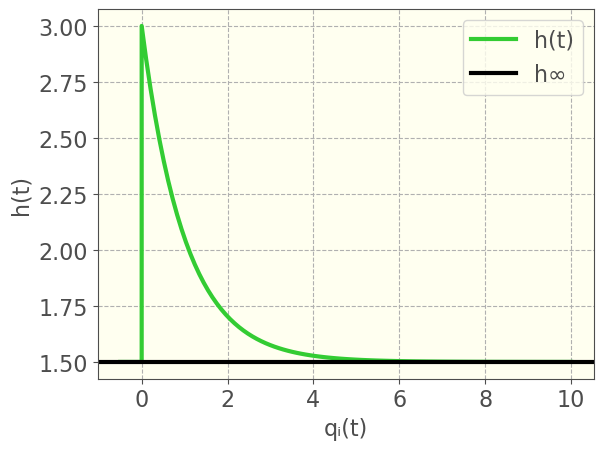

PyObject Text(33.0, 0.5, 'h(t)')

In [18]:
figure()
plot(t2,zz,label="h(t)")
axhline(y=hplus∞,label="h∞",color="black")
legend()
xlabel("qᵢ(t)")
ylabel("h(t)")